In [1]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

In [2]:
def topo_pos(G):
    """Display in topological order, with simple offsetting for legibility"""
    pos_dict = {}
    for i, node_list in enumerate(nx.topological_generations(G)):
        x_offset = len(node_list) / 2
        y_offset = 0.1
        for j, name in enumerate(node_list):
            pos_dict[name] = (j - x_offset, -i + j * y_offset)

    return pos_dict

In [3]:
df=pd.read_csv('../data/Base.csv')
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [4]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [5]:
fraud_df = df[df.fraud_bool==1]
fraud_df.shape

(11029, 32)

In [6]:
df_layer_1 = fraud_df[['source']]\
                .groupby(['source'])\
                .size()\
                .reset_index()\
                .rename(columns={0:'weight', 'source':'destination'})
df_layer_1['source'] = 'Source'
df_layer_1 = df_layer_1[['source', 'destination', 'weight']]
df_layer_1['weight'] = df_layer_1['weight']
df_layer_1['layer'] = 'layer_1'
df_layer_1

,source,destination,weight,layer
0,Source,INTERNET,10917,layer_1
1,Source,TELEAPP,112,layer_1


In [7]:
df_layer_2 = fraud_df[['source', 'device_os']]\
                .groupby(['source', 'device_os'])\
                .size()\
                .reset_index()\
                .rename(columns={0:'weight', 'device_os':'destination'})
df_layer_2['layer'] = 'layer_2'
df_layer_2

,source,destination,weight,layer
0,INTERNET,linux,1706,layer_2
1,INTERNET,macintosh,742,layer_2
2,INTERNET,other,1910,layer_2
3,INTERNET,windows,6478,layer_2
4,INTERNET,x11,81,layer_2
5,TELEAPP,linux,9,layer_2
6,TELEAPP,macintosh,10,layer_2
7,TELEAPP,other,64,layer_2
8,TELEAPP,windows,29,layer_2


In [8]:
df_layer_3 = fraud_df[['device_os', 'payment_type']]\
                .groupby(['device_os', 'payment_type'])\
                .size()\
                .reset_index()\
                .rename(columns={0:'weight', 'device_os':'source', 'payment_type':'destination'})
df_layer_3['layer'] = 'layer_3'
df_layer_3

,source,destination,weight,layer
0,linux,AA,211,layer_3
1,linux,AB,657,layer_3
2,linux,AC,668,layer_3
3,linux,AD,179,layer_3
4,macintosh,AA,111,layer_3
5,macintosh,AB,243,layer_3
6,macintosh,AC,305,layer_3
7,macintosh,AD,92,layer_3
8,macintosh,AE,1,layer_3
9,other,AA,356,layer_3


In [9]:
df_layer_4 = fraud_df[['payment_type', 'keep_alive_session']]
df_layer_4['keep_alive_session'] = df_layer_4['keep_alive_session'].map({0:'No', 1:'Yes'})
df_layer_4 = df_layer_4[['payment_type', 'keep_alive_session']]\
                .groupby(['payment_type', 'keep_alive_session'])\
                .size()\
                .reset_index()\
                .rename(columns={0:'weight', 'payment_type':'source', 'keep_alive_session':'destination'})
df_layer_4['layer'] = 'layer_4'
df_layer_4



C:\Users\jagan\AppData\Local\Temp\ipykernel_32048\178781244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_layer_4['keep_alive_session'] = df_layer_4['keep_alive_session'].map({0:'No', 1:'Yes'})


,source,destination,weight,layer
0,AA,No,850,layer_4
1,AA,Yes,514,layer_4
2,AB,No,2709,layer_4
3,AB,Yes,1460,layer_4
4,AC,No,2903,layer_4
5,AC,Yes,1306,layer_4
6,AD,No,798,layer_4
7,AD,Yes,488,layer_4
8,AE,No,1,layer_4


In [10]:
df_layer_5                          = fraud_df[['keep_alive_session', 'session_length_in_minutes']]
df_layer_5['keep_alive_session']    = df_layer_5['keep_alive_session'].map({0:'No', 1:'Yes'})
df_layer_5                          = df_layer_5[df_layer_5.session_length_in_minutes > 0]

df_layer_5['session_length'] = pd.cut(
                        x=df_layer_5['session_length_in_minutes'], 
                        bins=[0, 5, 15, 30, 60, 100],
                        labels=['< 5 Mins', '5-15 mins', '15-30 mins', '30-60 mins', '>60 mins']
                        )

df_layer_5 = df_layer_5[['keep_alive_session', 'session_length']]\
                .groupby(['keep_alive_session', 'session_length'])\
                .size()\
                .reset_index()\
                .rename(columns={0:'weight', 'keep_alive_session':'source', 'session_length':'destination'})
df_layer_5['layer'] = 'layer_5'
df_layer_5

C:\Users\jagan\AppData\Local\Temp\ipykernel_32048\1137526254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_layer_5['keep_alive_session']    = df_layer_5['keep_alive_session'].map({0:'No', 1:'Yes'})


,source,destination,weight,layer
0,No,< 5 Mins,3344,layer_5
1,No,5-15 mins,2919,layer_5
2,No,15-30 mins,593,layer_5
3,No,30-60 mins,362,layer_5
4,No,>60 mins,26,layer_5
5,Yes,< 5 Mins,2003,layer_5
6,Yes,5-15 mins,1370,layer_5
7,Yes,15-30 mins,259,layer_5
8,Yes,30-60 mins,125,layer_5
9,Yes,>60 mins,10,layer_5


In [14]:
graph_df = pd.concat([df_layer_1, df_layer_2, df_layer_3, df_layer_4, df_layer_5])
# graph_df.apply(lambda x: x.astype(str).str.upper())

In [15]:
graph_layer = list(graph_df[['source', 'destination', 'weight']].apply(tuple, axis=1))
graph_layer

[('Source', 'INTERNET', 10917),
 ('Source', 'TELEAPP', 112),
 ('INTERNET', 'linux', 1706),
 ('INTERNET', 'macintosh', 742),
 ('INTERNET', 'other', 1910),
 ('INTERNET', 'windows', 6478),
 ('INTERNET', 'x11', 81),
 ('TELEAPP', 'linux', 9),
 ('TELEAPP', 'macintosh', 10),
 ('TELEAPP', 'other', 64),
 ('TELEAPP', 'windows', 29),
 ('linux', 'AA', 211),
 ('linux', 'AB', 657),
 ('linux', 'AC', 668),
 ('linux', 'AD', 179),
 ('macintosh', 'AA', 111),
 ('macintosh', 'AB', 243),
 ('macintosh', 'AC', 305),
 ('macintosh', 'AD', 92),
 ('macintosh', 'AE', 1),
 ('other', 'AA', 356),
 ('other', 'AB', 615),
 ('other', 'AC', 780),
 ('other', 'AD', 223),
 ('windows', 'AA', 667),
 ('windows', 'AB', 2627),
 ('windows', 'AC', 2429),
 ('windows', 'AD', 784),
 ('x11', 'AA', 19),
 ('x11', 'AB', 27),
 ('x11', 'AC', 27),
 ('x11', 'AD', 8),
 ('AA', 'No', 850),
 ('AA', 'Yes', 514),
 ('AB', 'No', 2709),
 ('AB', 'Yes', 1460),
 ('AC', 'No', 2903),
 ('AC', 'Yes', 1306),
 ('AD', 'No', 798),
 ('AD', 'Yes', 488),
 ('AE', 'N

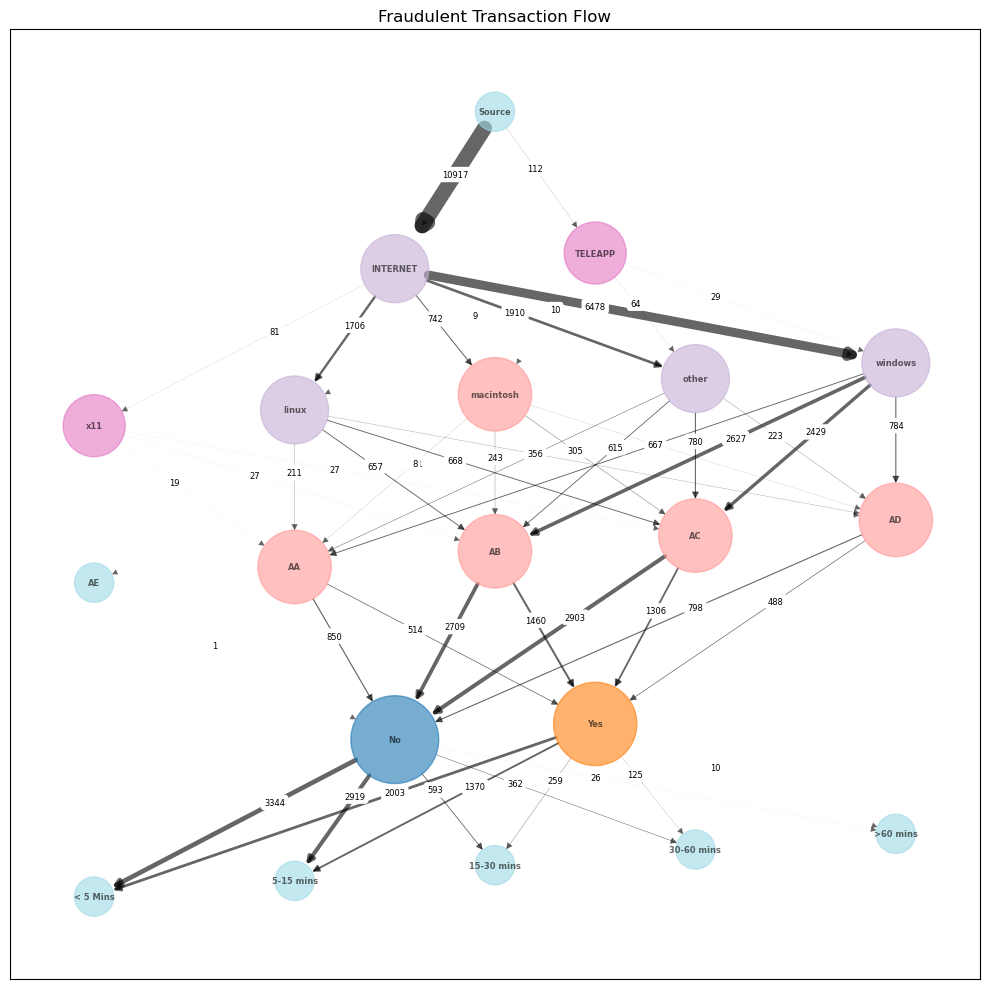

In [16]:
# Same example data as top answer, but directed
G=nx.DiGraph()
G.add_weighted_edges_from(graph_layer)
pos = topo_pos(G)
labels = nx.get_edge_attributes(G,'weight')


node_color = [G.degree(v) for v in G] # Node Color
node_size_dict = dict(G.degree)
node_size  = [node_size_dict[k]*400 for k in node_size_dict] # Node Color

edge_width = [0.0010 * G[u][v]['weight'] for u, v in G.edges()]  # Edge Width

fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(G, 
                 pos,
                 ax=ax,
                 font_size=6,
                 node_color = node_color, 
                 node_size=node_size,
                #  node_shape="c",
                 alpha = 0.6, 
                 width = edge_width, 
                 font_weight="bold",
                 cmap = plt.cm.tab20_r
                 )
nx.draw_networkx_edge_labels(G,
                             pos, 
                             edge_labels=labels,
                             label_pos = 0.6,
                             font_size=6,
                             alpha=1,
                             rotate=False,
                             )

ax.set_title("Fraudulent Transaction Flow")
fig.tight_layout()
plt.savefig('Fraudulent_Transaction_Flow.png')
plt.show()

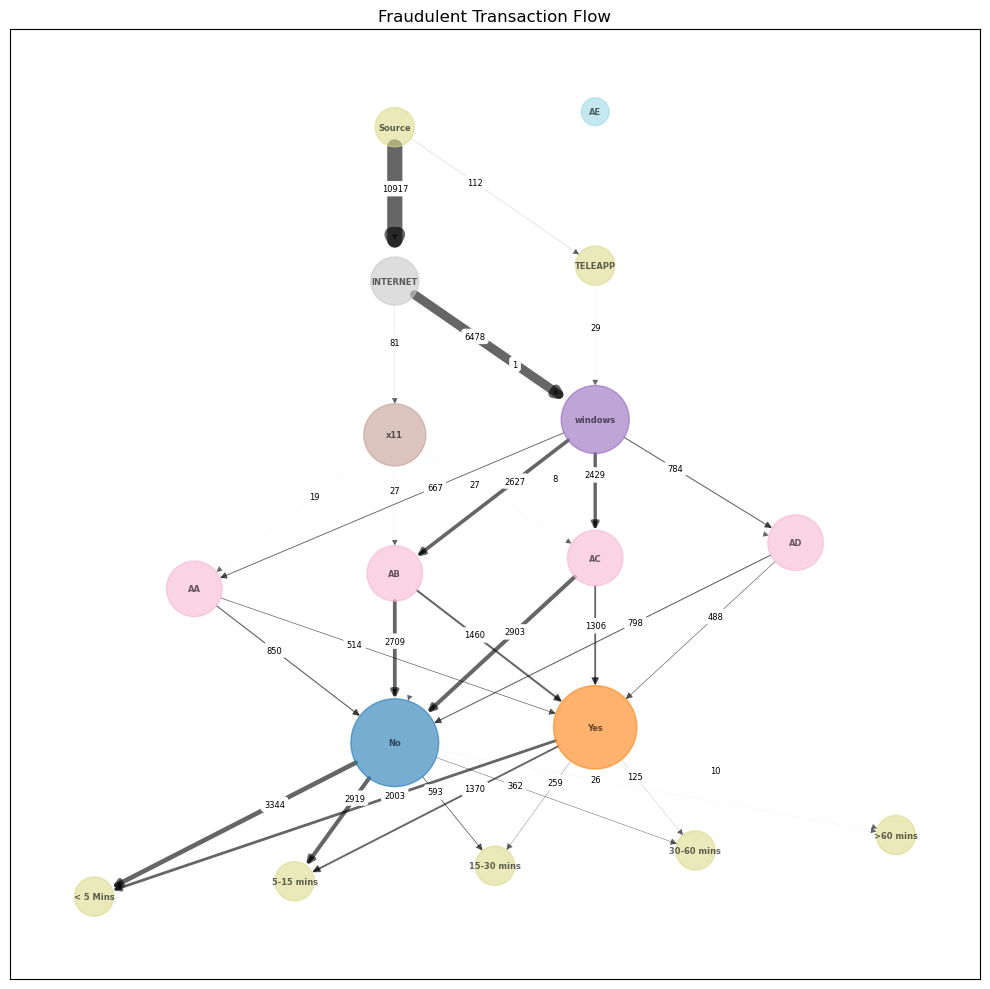

In [17]:
# Remove Node Customization
G=nx.DiGraph()
G.add_weighted_edges_from(graph_layer)
G.remove_nodes_from(['linux', 'macintosh', 'other']) ### Remove Nodes
pos = topo_pos(G)
labels = nx.get_edge_attributes(G,'weight')


node_color = [G.degree(v) for v in G] # Node Color
node_size_dict = dict(G.degree)
node_size  = [node_size_dict[k]*400 for k in node_size_dict] # Node Color

edge_width = [0.0010 * G[u][v]['weight'] for u, v in G.edges()]  # Edge Width

fig, ax = plt.subplots(figsize=(10,10))

nx.draw_networkx(G, 
                 pos,
                 ax=ax,
                 font_size=6,
                 node_color = node_color, 
                 node_size=node_size,
                #  node_shape="c",
                 alpha = 0.6, 
                 width = edge_width, 
                 font_weight="bold",
                 cmap = plt.cm.tab20_r
                 )
nx.draw_networkx_edge_labels(G,
                             pos, 
                             edge_labels=labels,
                             label_pos = 0.6,
                             font_size=6,
                             alpha=1,
                             rotate=False,
                             )

ax.set_title("Fraudulent Transaction Flow")
fig.tight_layout()
plt.savefig('Fraudulent_Transaction_Flow.png')
plt.show()
# list(G.edges)


In [194]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight